In [5]:
import pandas as pd
df = pd.read_csv("../data/Detalles_clientes.csv",index_col=False)

In [6]:
print(df.columns)
df.info()

Index(['Id_cliente', 'fecha_efectiva', 'Id_tx', 'clase', 'valor'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id_cliente      2448 non-null   int64  
 1   fecha_efectiva  2448 non-null   int64  
 2   Id_tx           2448 non-null   int64  
 3   clase           2448 non-null   object 
 4   valor           2448 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 95.8+ KB


In [7]:
df['valor'] = df['valor'].astype(str).str.replace("'", "")
df['valor'] = pd.to_numeric(df['valor'], errors='coerce')
df['clase'] = df['clase'].astype('category')
df['fecha_efectiva'] = pd.to_datetime(df['fecha_efectiva'], format='%Y%m%d')

Iniciando Fase 1: Análisis Exploratorio de Datos (EDA) 📊

### 1. Análisis Estadístico General ###
Número de clientes únicos: 70
Número de transacciones totales: 2448

Estadísticas del valor de las transacciones:
count        2,448.00
mean       375,839.60
std        583,485.29
min             20.00
25%         61,469.75
50%        164,844.50
75%        485,102.25
max      7,952,039.23
Name: valor, dtype: object
----------------------------------------------------------

### 2. Análisis por Tipo de Transacción (COMPRA vs AVANCE) ###

Distribución de transacciones por clase:
clase
COMPRA    1897
AVANCE     551
Name: count, dtype: int64

Valor total por clase:
clase
AVANCE    243,833,500.00
COMPRA    676,221,848.00
Name: valor, dtype: object


C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_7936\2882437509.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clase_valor = df.groupby('clase')['valor'].sum()
C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_7936\2882437509.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='clase', data=df, palette='viridis', order=clase_counts.index)


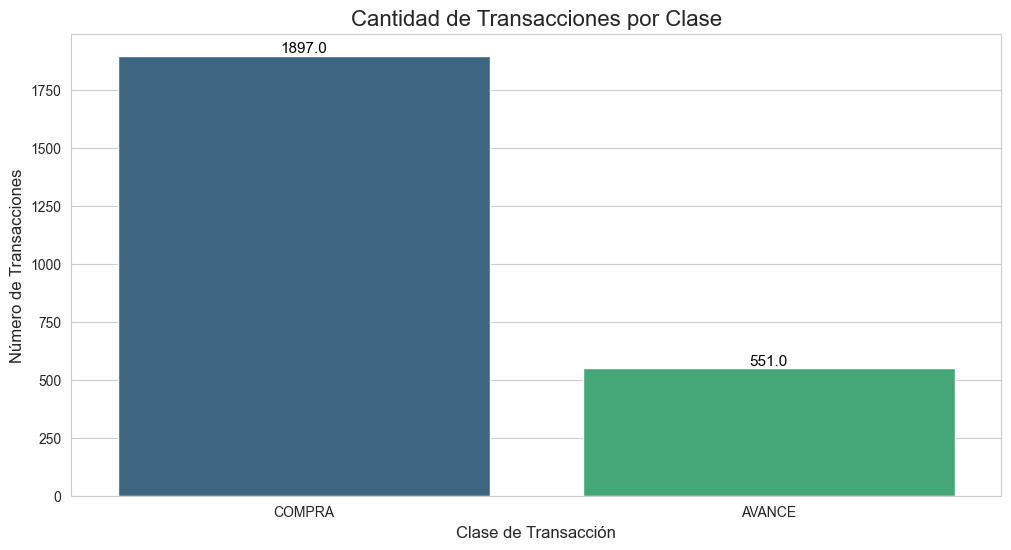

C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_7936\2882437509.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clase', y='valor', data=df, palette='magma')


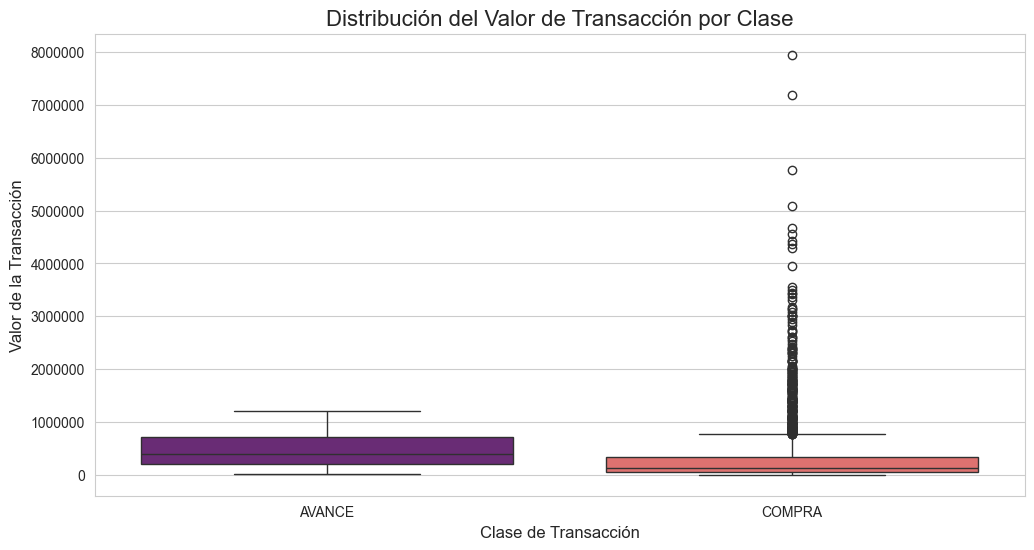

----------------------------------------------------------

### 3. Análisis Temporal ###

Resumen mensual de transacciones:
                numero_transacciones   valor_total
fecha_efectiva                                    
2020-09-30                       350  1.320393e+08
2020-10-31                       402  1.482522e+08
2020-11-30                       454  1.754049e+08
2020-12-31                       472  1.637759e+08
2021-01-31                       319  1.087342e+08
2021-02-28                       378  1.578312e+08
2021-03-31                        73  3.401747e+07


C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_7936\2882437509.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_summary = df_time.resample('M').agg(


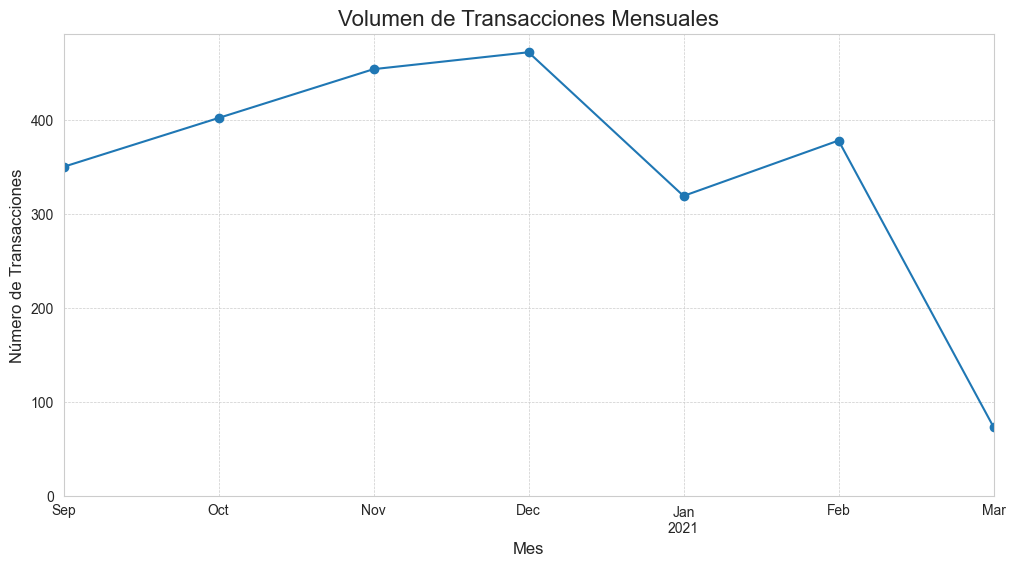

C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_7936\2882437509.py:94: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  valor_por_clase_mes = df_time.groupby([pd.Grouper(freq='M'), 'clase'])['valor'].sum().unstack()
C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_7936\2882437509.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valor_por_clase_mes = df_time.groupby([pd.Grouper(freq='M'), 'clase'])['valor'].sum().unstack()


<Figure size 1200x600 with 0 Axes>

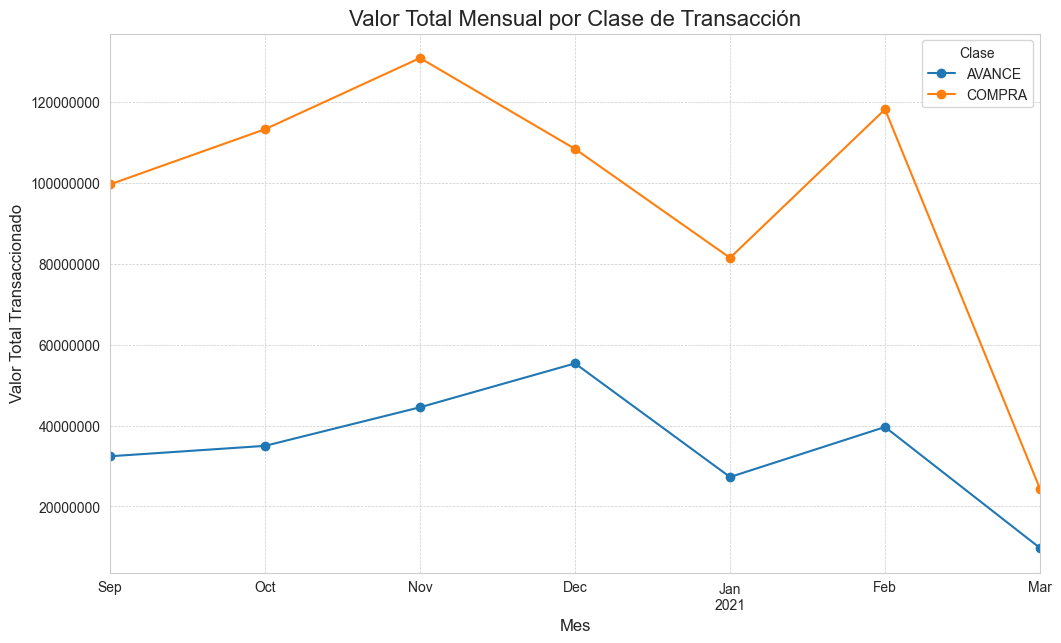


Análisis Descriptivo Completado ✅


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuración de Estilo para los Gráficos ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

print("Iniciando Fase 1: Análisis Exploratorio de Datos (EDA) 📊")
print("==========================================================")


# --- 1. Análisis Estadístico General ---
print("\n### 1. Análisis Estadístico General ###")

# Clientes y transacciones totales
num_clientes = df['Id_cliente'].nunique()
num_transacciones = len(df)
print(f"Número de clientes únicos: {num_clientes}")
print(f"Número de transacciones totales: {num_transacciones}")

# Estadísticas descriptivas de la columna 'valor'
print("\nEstadísticas del valor de las transacciones:")
print(df['valor'].describe().apply('{:,.2f}'.format))
print("----------------------------------------------------------")


# --- 2. Análisis por Tipo de Transacción (clase) ---
print("\n### 2. Análisis por Tipo de Transacción (COMPRA vs AVANCE) ###")

# Conteo y valor por clase
clase_counts = df['clase'].value_counts()
clase_valor = df.groupby('clase')['valor'].sum()

print("\nDistribución de transacciones por clase:")
print(clase_counts)
print("\nValor total por clase:")
print(clase_valor.apply('{:,.2f}'.format))

# Gráfico 1: Cantidad de transacciones por clase
plt.figure()
ax = sns.countplot(x='clase', data=df, palette='viridis', order=clase_counts.index)
ax.set_title('Cantidad de Transacciones por Clase')
ax.set_xlabel('Clase de Transacción')
ax.set_ylabel('Número de Transacciones')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# Gráfico 2: Distribución del valor por clase
plt.figure()
sns.boxplot(x='clase', y='valor', data=df, palette='magma')
plt.title('Distribución del Valor de Transacción por Clase')
plt.xlabel('Clase de Transacción')
plt.ylabel('Valor de la Transacción')
plt.ticklabel_format(style='plain', axis='y') # Evita notación científica
plt.show()
print("----------------------------------------------------------")


# --- 3. Análisis Temporal (fecha_efectiva) ---
print("\n### 3. Análisis Temporal ###")

# Aseguramos que el índice sea la fecha para facilitar el re-muestreo
df_time = df.set_index('fecha_efectiva')

# Re-muestreamos por mes para ver tendencias
# 'M' agrupa por fin de mes
monthly_summary = df_time.resample('M').agg(
    numero_transacciones=('Id_tx', 'count'),
    valor_total=('valor', 'sum')
)

print("\nResumen mensual de transacciones:")
print(monthly_summary)

# Gráfico 3: Tendencia del Volumen de Transacciones Mensuales
plt.figure()
monthly_summary['numero_transacciones'].plot(kind='line', marker='o')
plt.title('Volumen de Transacciones Mensuales')
plt.xlabel('Mes')
plt.ylabel('Número de Transacciones')
plt.ylim(bottom=0) # Asegurar que el eje Y empiece en 0
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Gráfico 4: Tendencia del Valor Total Mensual por Clase
plt.figure()
# Pivotamos los datos para tener 'COMPRA' y 'AVANCE' como columnas
valor_por_clase_mes = df_time.groupby([pd.Grouper(freq='M'), 'clase'])['valor'].sum().unstack()

valor_por_clase_mes.plot(kind='line', marker='o', figsize=(12,7))
plt.title('Valor Total Mensual por Clase de Transacción')
plt.xlabel('Mes')
plt.ylabel('Valor Total Transaccionado')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Clase')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

print("\n==========================================================")
print("Análisis Descriptivo Completado ✅")